# Base Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Knowladge-engineering\/Project/datasets/matches.csv')

df.columns

Index(['season', 'team1', 'team2', 'date', 'match_number', 'venue', 'city',
       'toss_winner', 'toss_decision', 'player_of_match', 'umpire1', 'umpire2',
       'reserve_umpire', 'match_referee', 'winner', 'winner_runs',
       'winner_wickets', 'match_type'],
      dtype='object')

#Venue

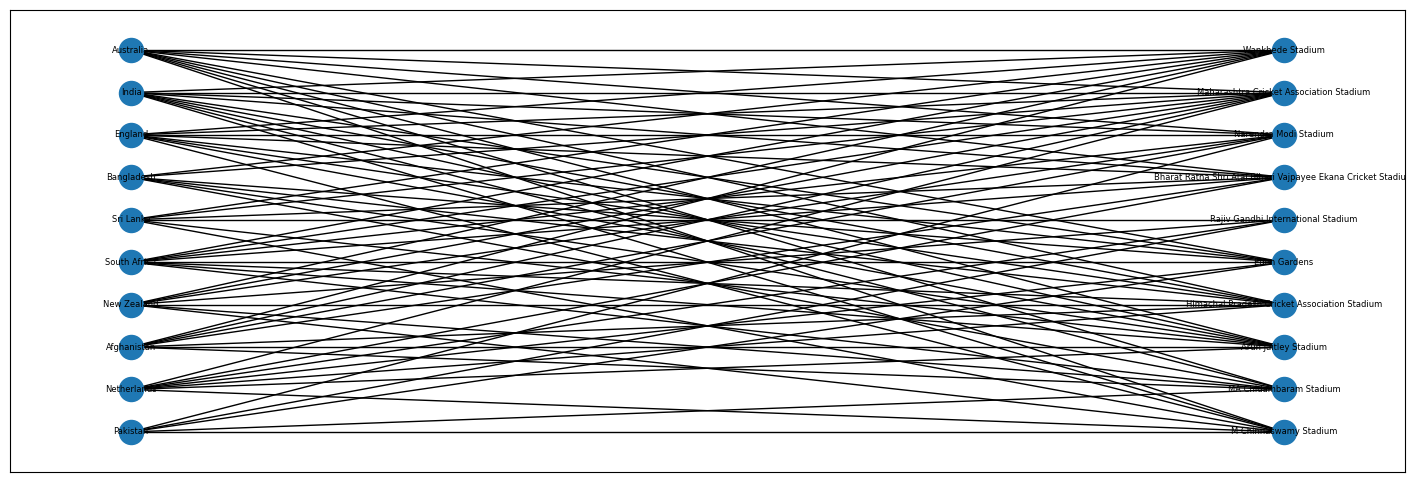

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty bipartite graph
G = nx.Graph()

# Extract actors and event types from the dataset
actors = set(df['team1']).union(set(df['team2']))
event_types = set(df['venue'])

# Add nodes for actors and event types
G.add_nodes_from(actors, bipartite=0)  # actors are in set 0
G.add_nodes_from(event_types, bipartite=1)  # event types are in set 1

# Add edges between actors and event types
for _, row in df.iterrows():
    team1 = row['team1']
    team2 = row['team2']
    event_type = row['venue']
    G.add_edge(team1, event_type)
    G.add_edge(team2, event_type)


# Extend the image size
plt.figure(figsize=(18, 6))  # Adjust the figsize as per your preference

# Visualize the bipartite graph
pos = nx.bipartite_layout(G, actors)
nx.draw_networkx(G, pos=pos, with_labels=True, font_size=6)
plt.show()


#Toss Winner

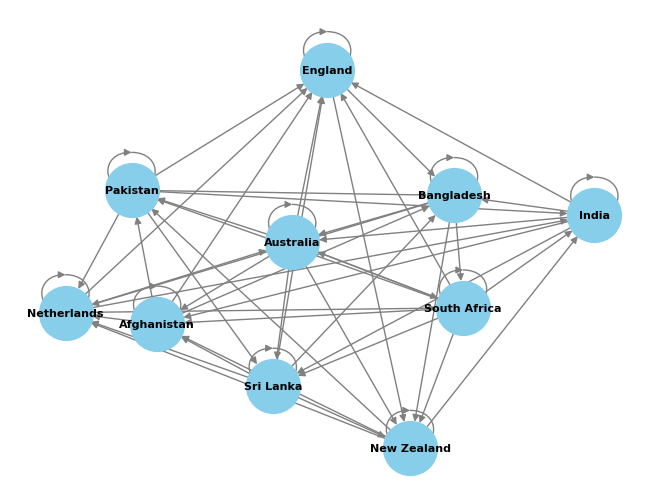

In [ ]:
# Extract team1, team2, and toss_winner
team1 = df["team1"].tolist()
team2 = df["team2"].tolist()
toss_winner = df["toss_winner"].tolist()

# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add edges for toss_winner connections
for i in range(len(team1)):
    G.add_edge(team1[i], toss_winner[i])
    G.add_edge(team2[i], toss_winner[i])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=1500, font_size=8, edge_color='gray', arrowsize=10)

# Show the plot
plt.show()


#Toss Decision

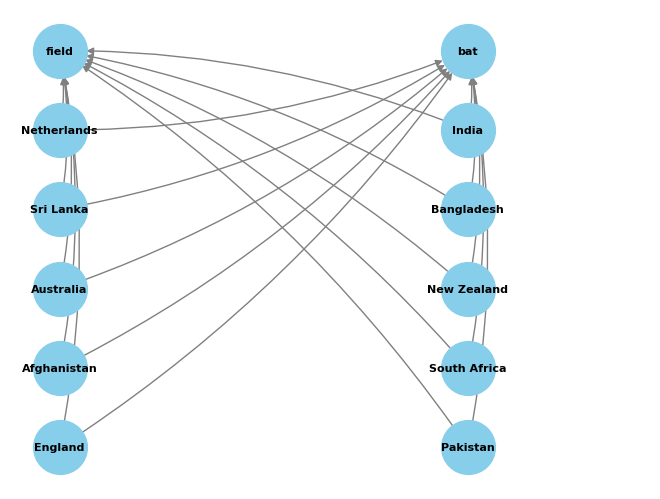

In [ ]:
# Assuming df is your DataFrame
# Extract team1, team2, and toss_decision information
team1 = df["team1"].tolist()
team2 = df["team2"].tolist()
toss_decision = df["toss_decision"].tolist()

# Create a graph using NetworkX
G = nx.DiGraph()

# Add nodes for teams and toss_decision
G.add_nodes_from(team1, bipartite=0, label='team')
G.add_nodes_from(team2, bipartite=1, label='team')
G.add_nodes_from(toss_decision, bipartite=2, label='toss_decision')

# Add edges for toss_decision connections
for t1, t2, decision in zip(team1, team2, toss_decision):
    G.add_edge(t1, decision)
    G.add_edge(t2, decision)

# Draw the bipartite directed graph
pos = {node: (0, i) if i % 2 == 0 else (1, i-1) for i, node in enumerate(G.nodes)}
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=1500, font_size=8, edge_color='gray', connectionstyle='arc3,rad=0.1')

# Show the plot
plt.show()


#Match Winner

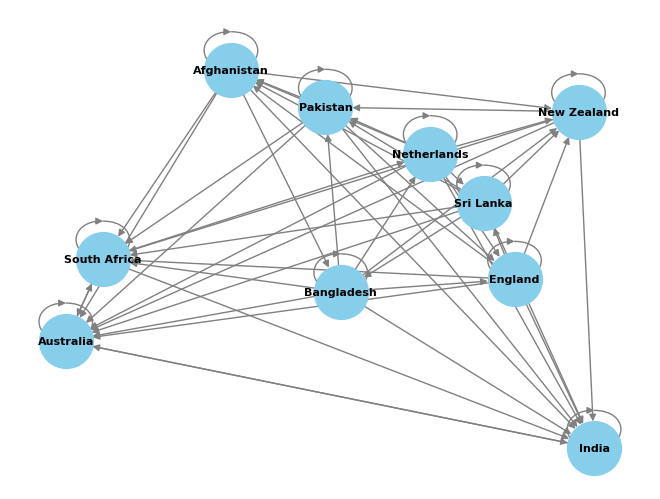

In [ ]:
# Extract team1, team2, and winner
team1 = df["team1"].tolist()
team2 = df["team2"].tolist()
winner = df["winner"].tolist()

# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add edges for winner connections
for i in range(len(team1)):
    G.add_edge(team1[i], winner[i])
    G.add_edge(team2[i], winner[i])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=1500, font_size=8, edge_color='gray', arrowsize=10)

# Show the plot
plt.show()


#Eccentricity of the Graph

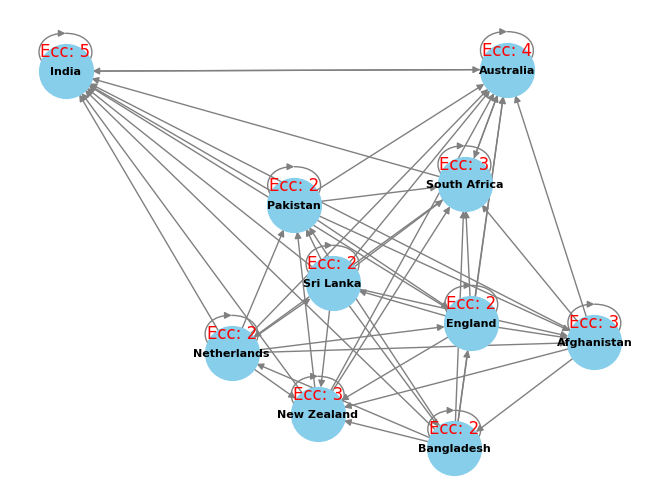

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Extract team1, team2, and winner
team1 = df["team1"].tolist()
team2 = df["team2"].tolist()
winner = df["winner"].tolist()

# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add edges for winner connections
for i in range(len(team1)):
    G.add_edge(team1[i], winner[i])
    G.add_edge(team2[i], winner[i])

# Calculate eccentricity for nodes in the strongly connected component
strongly_connected_component = max(nx.strongly_connected_components(G), key=len)
eccentricities = nx.eccentricity(G.subgraph(strongly_connected_component))

# Draw the graph with eccentricity labels
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=1500, font_size=8, edge_color='gray', arrowsize=10)

# Add eccentricity labels to nodes
eccentricity_labels = {node: f'Ecc: {eccentricities[node]}' for node in strongly_connected_component}
pos_labels = {node: (pos[node][0], pos[node][1] + 0.1) for node in eccentricity_labels}
nx.draw_networkx_labels(G, pos_labels, labels=eccentricity_labels, font_size=12, font_color='red')

# Show the plot
plt.show()


#Centrality of the graph

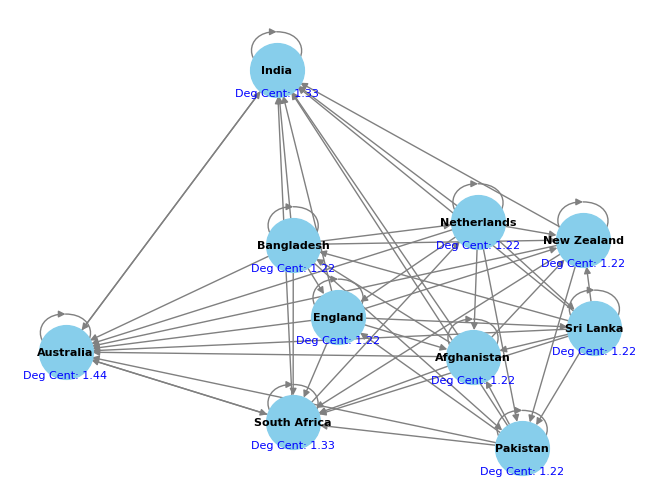

In [ ]:
# Extract team1, team2, and winner
team1 = df["team1"].tolist()
team2 = df["team2"].tolist()
winner = df["winner"].tolist()

# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add edges for winner connections
for i in range(len(team1)):
    G.add_edge(team1[i], winner[i])
    G.add_edge(team2[i], winner[i])

# Calculate eccentricity for nodes in the strongly connected component
strongly_connected_component = max(nx.strongly_connected_components(G), key=len)
eccentricities = nx.eccentricity(G.subgraph(strongly_connected_component))

# Calculate degree centrality for all nodes
degree_centrality = nx.degree_centrality(G)

# Draw the graph with eccentricity and centrality labels
pos = nx.spring_layout(G)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=1500, font_size=8, edge_color='gray', arrowsize=10)

# Add degree centrality labels to nodes
centrality_labels = {node: f'Deg Cent: {degree_centrality[node]:.2f}' for node in G.nodes}
pos_labels_centrality = {node: (pos[node][0], pos[node][1] - 0.1) for node in centrality_labels}
nx.draw_networkx_labels(G, pos_labels_centrality, labels=centrality_labels, font_size=8, font_color='blue')

# Show the plot
plt.show()


#Diameter of the graph

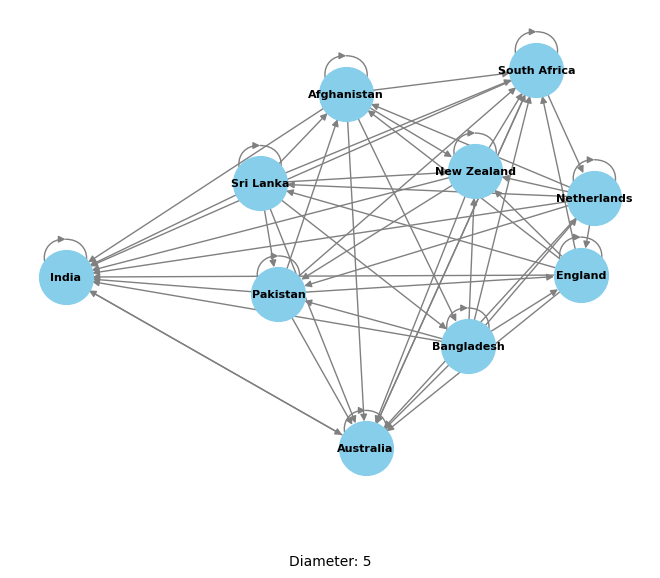

In [ ]:

# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add edges for winner connections
for i in range(len(team1)):
    G.add_edge(team1[i], winner[i])
    G.add_edge(team2[i], winner[i])

# Calculate eccentricity for nodes in the strongly connected component
strongly_connected_component = max(nx.strongly_connected_components(G), key=len)
eccentricities = nx.eccentricity(G.subgraph(strongly_connected_component))

# Calculate degree centrality for all nodes
degree_centrality = nx.degree_centrality(G)

# Calculate the diameter of the graph
diameter = nx.diameter(G)

# Draw the graph with eccentricity, centrality, and diameter labels
pos = nx.spring_layout(G)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=1500, font_size=8, edge_color='gray', arrowsize=10)

# Add diameter label
plt.text(0.5, -0.15, f'Diameter: {diameter}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=10)

# Show the plot
plt.show()


#Player of the match

Match 1: R Ravindra
Match 2: Saud Shakeel
Match 3: Mehedi Hasan Miraz
Match 4: AK Markram
Match 5: KL Rahul
Match 6: MJ Santner
Match 7: DJ Malan
Match 8: Mohammad Rizwan
Match 9: RG Sharma
Match 10: Q de Kock
Match 11: LH Ferguson
Match 12: JJ Bumrah
Match 13: Mujeeb Ur Rahman
Match 14: A Zampa
Match 15: SA Edwards
Match 16: GD Phillips
Match 17: V Kohli
Match 18: DA Warner
Match 19: S Samarawickrama
Match 20: H Klaasen
Match 21: Mohammed Shami
Match 22: Ibrahim Zadran
Match 23: Q de Kock
Match 24: GJ Maxwell
Match 25: CBRLS Kumara
Match 26: T Shamsi
Match 27: TM Head
Match 28: PA van Meekeren
Match 29: RG Sharma
Match 30: Fazalhaq Farooqi
Match 31: Fakhar Zaman
Match 32: HE van der Dussen
Match 33: Mohammed Shami
Match 34: Mohammad Nabi
Match 35: Fakhar Zaman
Match 36: A Zampa
Match 37: V Kohli
Match 38: Shakib Al Hasan
Match 39: GJ Maxwell
Match 40: BA Stokes
Match 41: TA Boult
Match 42: HE van der Dussen
Match 43: MR Marsh
Match 44: DJ Willey
Match 45: SS Iyer
Match 46: Mohammed Sh

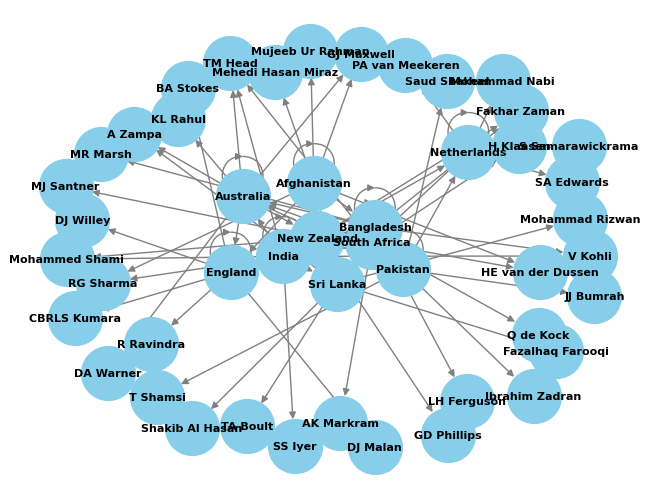

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load data from CSV file


# Extract team1, team2, toss_winner, and player_of_match
team1 = df["team1"].tolist()
team2 = df["team1"].tolist()
toss_winner = df["toss_winner"].tolist()
player_of_match = df["player_of_match"].tolist()

# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add edges for toss_winner connections
for i in range(len(team1)):
    G.add_edge(team1[i], toss_winner[i])
    G.add_edge(team2[i], toss_winner[i])

# Add edges for player_of_match connections
for i in range(len(team1)):
    G.add_edge(team1[i], player_of_match[i])
    G.add_edge(team2[i], player_of_match[i])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=1500, font_size=8, edge_color='gray', arrowsize=10)

# Display player of the match in each match
for i in range(len(team1)):
    print(f"Match {i + 1}: {player_of_match[i]}")

# Show the plot
plt.show()


#Umpire for each match

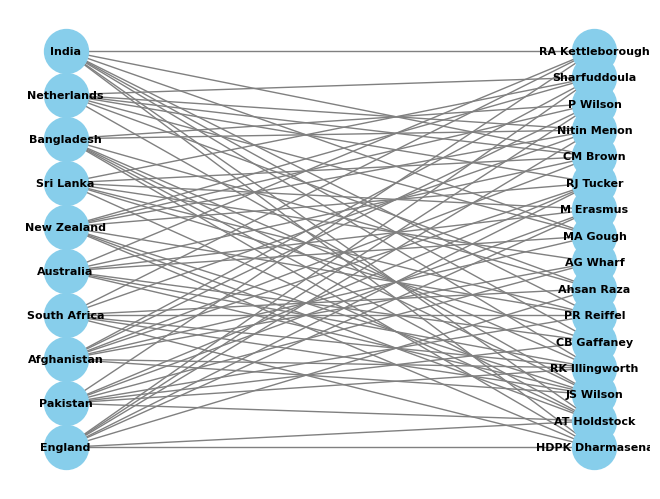

In [ ]:


# Extract team1, team2, umpire1, and umpire2
team1 = df["team1"].tolist()
team2 = df["team2"].tolist()
umpire1 = df["umpire1"].tolist()
umpire2 = df["umpire2"].tolist()

# Create a list of match tuples (team1, team2, umpire1, umpire2)
matches = list(zip(team1, team2, umpire1, umpire2))

# Create a bipartite graph using NetworkX
B = nx.Graph()

# Add nodes for teams and umpires
B.add_nodes_from(team1, bipartite=0, label='team')
B.add_nodes_from(umpire1, bipartite=1, label='umpire')

# Add edges for each match
for match in matches:
    B.add_edges_from([(match[0], match[2]), (match[1], match[3])])

# Draw the bipartite graph
pos = nx.bipartite_layout(B, team1)
nx.draw(B, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=1000, font_size=8, edge_color='gray')

# Show the plot
plt.show()


#Venue and City

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming df is your DataFrame
# Extract venue, city, and match information
venue = df["venue"].tolist()
city = df["city"].tolist()
match_numbers = [f"Match {i+1}" for i in range(len(df))]

# Create a list of match tuples (venue, city, match_number)
matches = list(zip(venue, city, match_numbers))

# Create a graph using Plotly
fig = go.Figure()

# Add nodes for venues, cities, and matches
fig.add_trace(go.Scatter(x=[match[2] for match in matches], y=[match[0] for match in matches],
                         mode='markers', text=venue, marker=dict(color='skyblue', size=10),
                         name='Venue'))

fig.add_trace(go.Scatter(x=[match[2] for match in matches], y=[match[1] for match in matches],
                         mode='markers', text=city, marker=dict(color='orange', size=10),
                         name='City'))

# Add edges connecting matches to venues and cities
for match in matches:
    fig.add_trace(go.Scatter(x=[match[2], match[2]], y=[match[0], match[1]],
                             mode='lines', line=dict(color='gray'), showlegend=False))

# Customize layout
fig.update_layout(title='Match, Venue, and City Visualization',
                  xaxis=dict(title='Match Number'),
                  yaxis=dict(title='Venue/City'),
                  showlegend=True)

# Show the plot
fig.show()


#Winner Runs

In [ ]:
team1 = df["team1"].tolist()
team2 = df["team2"].tolist()
winner_runs = df["winner_runs"].tolist()

# Create a graph using Plotly
fig = go.Figure()

# Add nodes for teams and winner_runs
fig.add_trace(go.Scatter(x=team1, y=winner_runs, mode='markers', text=team1,
                         marker=dict(color='blue', size=10), name='Team1'))

fig.add_trace(go.Scatter(x=team2, y=winner_runs, mode='markers', text=team2,
                         marker=dict(color='green', size=10), name='Team2'))

# Customize layout
fig.update_layout(title='Team1, Team2, and Winner\'s Runs Visualization',
                  xaxis=dict(title='Teams'),
                  yaxis=dict(title='Winner\'s Runs'),
                  showlegend=True)

# Show the plot
fig.show()


In [ ]:
deliveries = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Knowladge-engineering\/Project/datasets/deliveries.csv')

## remove unnecessary attributes

#Number of inings

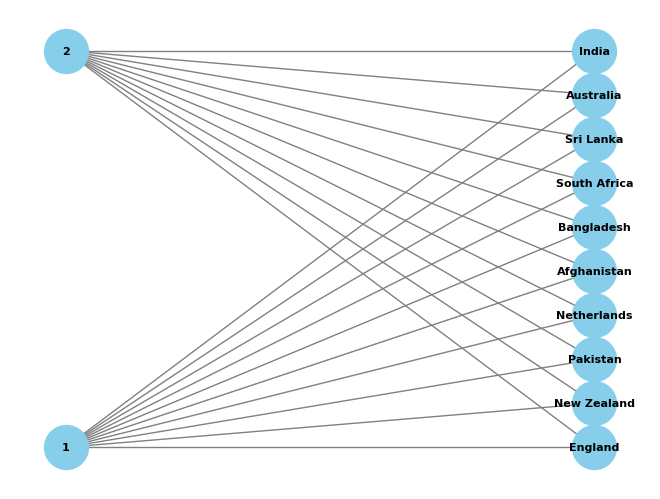

In [ ]:

# Assuming df is your DataFrame
# Extract innings and batting_team information
innings = deliveries["innings"].tolist()
batting_team = deliveries["batting_team"].tolist()

# Create a graph using NetworkX
G = nx.Graph()

# Add nodes for innings and teams
G.add_nodes_from(innings, bipartite=0, label='innings')
G.add_nodes_from(batting_team, bipartite=1, label='team')

# Add edges for connections between innings and teams
for inning, team in zip(innings, batting_team):
    G.add_edge(inning, team)

# Draw the bipartite graph
pos = nx.bipartite_layout(G, innings)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=1000, font_size=8, edge_color='gray')

# Show the plot
plt.show()


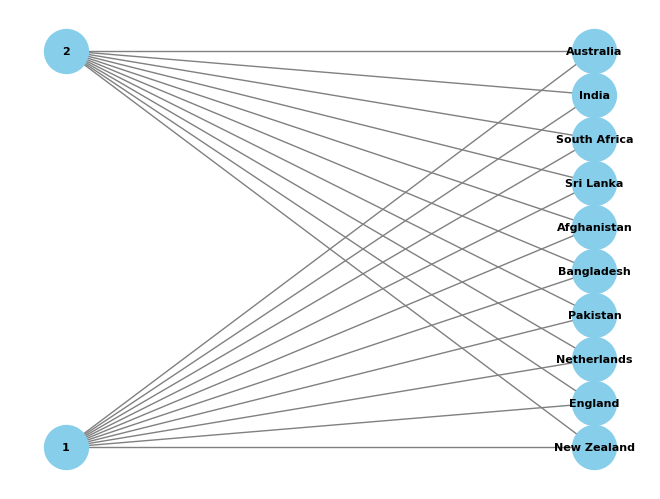

In [ ]:

# Assuming df is your DataFrame
# Extract innings and batting_team information
innings = deliveries["innings"].tolist()
bolling = deliveries["bowling_team"].tolist()

# Create a graph using NetworkX
G = nx.Graph()

# Add nodes for innings and teams
G.add_nodes_from(innings, bipartite=0, label='innings')
G.add_nodes_from(bolling, bipartite=1, label='team')

# Add edges for connections between innings and teams
for inning, team in zip(innings, bolling):
    G.add_edge(inning, team)

# Draw the bipartite graph
pos = nx.bipartite_layout(G, innings)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=1000, font_size=8, edge_color='gray')

# Show the plot
plt.show()


In [ ]:
df.columns

Index(['season', 'team1', 'team2', 'date', 'match_number', 'venue', 'city',
       'toss_winner', 'toss_decision', 'player_of_match', 'umpire1', 'umpire2',
       'reserve_umpire', 'match_referee', 'winner', 'winner_runs',
       'winner_wickets', 'match_type'],
      dtype='object')

#K-Means Clustering

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming deliveries is your DataFrame with columns ball, bowler, runs_off_bat, extras

# Combine runs_off_bat and extras to get total runs
deliveries['total_runs'] = deliveries['runs_off_bat'] + deliveries['extras']

# Select relevant columns for clustering
data = deliveries[['ball', 'total_runs']]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
deliveries['cluster'] = kmeans.fit_predict(data_scaled)

# Define run categories
deliveries['run_category'] = pd.cut(deliveries['total_runs'], bins=[0, 3, 6, float('inf')], labels=['0-3', '4-6', 'more_than_7'])

# Create a scatter plot using Plotly
fig = go.Figure()

for cluster in deliveries['cluster'].unique():
    cluster_data = deliveries[deliveries['cluster'] == cluster]
    fig.add_trace(go.Scatter(
        x=cluster_data['ball'],
        y=cluster_data['total_runs'],
        mode='markers',
        name=f'Cluster {cluster}'
    ))

fig.update_layout(
    title='Clustering of Runs for Each Bowler',
    xaxis=dict(title='Ball'),
    yaxis=dict(title='Total Runs'),
    legend=dict(title='Clusters'),
    autosize=False,
    width=1200,
    height=600,
)

fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



# Agglomerative Hierarchical Clustering,

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


TypeError: ignored

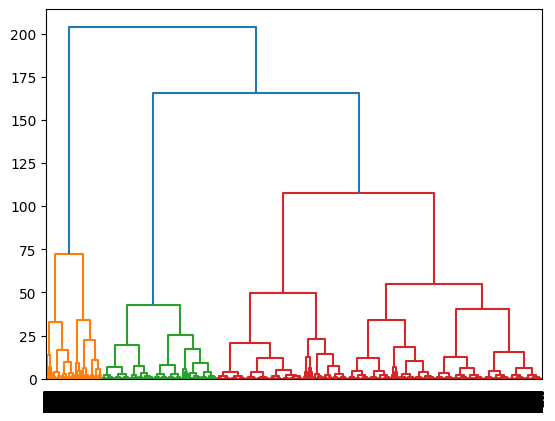

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming deliveries is your DataFrame with columns ball, bowler, runs_off_bat, extras

# Combine runs_off_bat and extras to get total runs
deliveries['total_runs'] = deliveries['runs_off_bat'] + deliveries['extras']

# Select relevant columns for clustering
data = deliveries[['ball', 'total_runs']]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform hierarchical clustering
linkage_matrix = linkage(data_scaled, method='ward')  # Ward linkage is used for agglomerative hierarchical clustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
deliveries['cluster'] = hc.fit_predict(data_scaled)

# Create a dendrogram
dendrogram_fig = go.Figure()
dendrogram_fig.add_trace(go.Scatter(x=[f'Object {i}' for i in range(len(data_scaled))],
                                   y=dendrogram(linkage_matrix)['dcoord'][:, 1],
                                   mode='lines',
                                   marker=dict(color='red'),
                                   name='Dendrogram'))

dendrogram_fig.update_layout(
    title='Dendrogram for Agglomerative Hierarchical Clustering',
    xaxis=dict(title='Objects'),
    yaxis=dict(title='Distance'),
    autosize=False,
    width=800,
    height=400,
)

dendrogram_fig.show()

# Create a scatter plot using Plotly
scatter_fig = go.Figure()

for cluster in deliveries['cluster'].unique():
    cluster_data = deliveries[deliveries['cluster'] == cluster]
    scatter_fig.add_trace(go.Scatter(
        x=cluster_data['ball'],
        y=cluster_data['total_runs'],
        mode='markers',
        name=f'Cluster {cluster}'
    ))

scatter_fig.update_layout(
    title='Agglomerative Hierarchical Clustering of Runs for Each Bowler',
    xaxis=dict(title='Ball'),
    yaxis=dict(title='Total Runs'),
    legend=dict(title='Clusters'),
    autosize=False,
    width=800,
    height=500,
)

scatter_fig.show()


#Affinity Propagation
#Your session crashed after using all available RAM. If you are interested in access to high-RAM runtimes, you may want to check out

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AffinityPropagation

# Assuming deliveries is your DataFrame with columns ball, bowler, runs_off_bat, extras

# Combine runs_off_bat and extras to get total runs
deliveries['total_runs'] = deliveries['runs_off_bat'] + deliveries['extras']

# Select relevant columns for clustering
data = deliveries[['ball', 'total_runs']]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform Affinity Propagation clustering
af = AffinityPropagation()
deliveries['cluster'] = af.fit_predict(data_scaled)

# Create a scatter plot using Plotly
scatter_fig = go.Figure()

for cluster in np.unique(deliveries['cluster']):
    cluster_data = deliveries[deliveries['cluster'] == cluster]
    scatter_fig.add_trace(go.Scatter(
        x=cluster_data['ball'],
        y=cluster_data['total_runs'],
        mode='markers',
        name=f'Cluster {cluster}'
    ))

scatter_fig.update_layout(
    title='Affinity Propagation Clustering of Runs for Each Bowler',
    xaxis=dict(title='Ball'),
    yaxis=dict(title='Total Runs'),
    legend=dict(title='Clusters'),
    autosize=False,
    width=800,
    height=500,
)

scatter_fig.show()


#Density-Based Clustering

#Markov Clustering
#Your session crashed after using all available RAM. If you are interested in access to high-RAM runtimes, you may want to check out

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import networkx as nx
import markov_clustering as mc

# Assuming deliveries is your DataFrame with columns ball, bowler, runs_off_bat, extras

# Combine runs_off_bat and extras to get total runs
deliveries['total_runs'] = deliveries['runs_off_bat'] + deliveries['extras']

# Select relevant columns for clustering
data = deliveries[['ball', 'total_runs']]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Create an affinity matrix
affinity_matrix = np.exp(-np.sum((data_scaled[:, None] - data_scaled) ** 2, axis=-1) / (2.0 * (0.5 ** 2)))

# Perform Markov Clustering
result = mc.run_mcl(affinity_matrix)
clusters = mc.get_clusters(result)

# Add cluster labels to the DataFrame
deliveries['cluster'] = np.nan
for cluster_id, cluster in enumerate(clusters):
    deliveries.loc[deliveries.index[cluster], 'cluster'] = cluster_id

# Create a scatter plot using Plotly
scatter_fig = go.Figure()

for cluster in deliveries['cluster'].unique():
    cluster_data = deliveries[deliveries['cluster'] == cluster]
    scatter_fig.add_trace(go.Scatter(
        x=cluster_data['ball'],
        y=cluster_data['total_runs'],
        mode='markers',
        name=f'Cluster {cluster}'
    ))

scatter_fig.update_layout(
    title='Markov Clustering of Runs for Each Bowler',
    xaxis=dict(title='Ball'),
    yaxis=dict(title='Total Runs'),
    legend=dict(title='Clusters'),
    autosize=False,
    width=800,
    height=500,
)

scatter_fig.show()


#Fast Greedy Algorithm

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import networkx as nx
import community  # python-louvain library

# Assuming deliveries is your DataFrame with columns ball, bowler, runs_off_bat, extras

# Combine runs_off_bat and extras to get total runs
deliveries['total_runs'] = deliveries['runs_off_bat'] + deliveries['extras']

# Select relevant columns for clustering
data = deliveries[['ball', 'total_runs']]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Create a graph from the data
G = nx.Graph()

# Add nodes with attributes (ball and total_runs)
for index, row in deliveries.iterrows():
    G.add_node(index, ball=row['ball'], total_runs=row['total_runs'])

# Add edges between nodes (assuming similarity metric, e.g., Euclidean distance)
for i in range(len(data_scaled)):
    for j in range(i + 1, len(data_scaled)):
        similarity = -np.linalg.norm(data_scaled[i] - data_scaled[j])
        G.add_edge(i, j, weight=similarity)

# Apply Louvain algorithm for community detection
partition = community.best_partition(G)

# Add community labels to the DataFrame
deliveries['community'] = deliveries.index.map(partition)

# Create a scatter plot using Plotly
scatter_fig = go.Figure()

for community_id in deliveries['community'].unique():
    community_data = deliveries[deliveries['community'] == community_id]
    scatter_fig.add_trace(go.Scatter(
        x=community_data['ball'],
        y=community_data['total_runs'],
        mode='markers',
        name=f'Community {community_id}'
    ))

scatter_fig.update_layout(
    title='Community Detection using Fast Greedy Algorithm (Louvain)',
    xaxis=dict(title='Ball'),
    yaxis=dict(title='Total Runs'),
    legend=dict(title='Communities'),
    autosize=False,
    width=800,
    height=500,
)

scatter_fig.show()


## attributes value counts

In [ ]:
df['team2'].value_counts()

New Zealand     6
Australia       6
Netherlands     5
Bangladesh      5
India           5
Pakistan        5
Sri Lanka       4
England         4
South Africa    4
Afghanistan     4
Name: team2, dtype: int64

In [ ]:
df['team1'].value_counts()[0:30]

South Africa    6
India           6
England         5
Afghanistan     5
Australia       5
Sri Lanka       5
Pakistan        4
New Zealand     4
Bangladesh      4
Netherlands     4
Name: team1, dtype: int64

## Additional Task

In [ ]:
# Apply some Graph clustering algorithms like
# K-Means Clustering, Spectral Clustering, Modularity-Based Methods (e.g., Louvain Method, Girvan-Newman Algorithm),
# Agglomerative Hierarchical Clustering, Affinity Propagation, Density-Based Clustering (e.g., DBSCAN),
# Markov Clustering (MCL), Fast Greedy Algorithm, Infomap.